## Riksdagen P1204  
version 2.2

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
  * Phabricator [T235521](https://phabricator.wikimedia.org/T235521)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2023-04-30 07:44:22.135963


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(4)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
210,b1c8e687-235c-4332-af02-94319127adc5,40db74f6-0282-4938-aa17-b4679a8bf2b4,0980370282703,2342025,1939,man,Bergstig,Lars,"Bergstig,Lars",,FP,,Tidigare ersättare,https://data.riksdagen.se/person/40db74f6-0282...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['inform..."
737,fcbbc40a-bf87-41b0-b5b7-b30d2810f685,6f818cd1-9a97-412f-bc59-1d1e8a2ceb19,0760500234712,3057202,1963,kvinna,Haider,Monica,"Haider,Monica",,S,Kronobergs län,Tjänstgörande riksdagsledamot,https://data.riksdagen.se/person/6f818cd1-9a97...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
1099,2870c120-0f1c-4cf6-97c3-bce8742fc574,d7c3196f-83e4-11d4-ae60-0050040c9b55,0559652845303,2342260,1944,man,Lander,Jarl,"Lander,Jarl",,S,Värmlands län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/d7c3196f-83e4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
703,638a393d-d6eb-4497-b5f5-6e419d5c4e05,afa179d0-61d1-4c09-9d29-ed94757431df,0557059020608,2341889,1935,kvinna,Gustavsson,Stina,"Gustavsson,Stina",,C,,Avliden 2018-02-25,https://data.riksdagen.se/person/afa179d0-61d1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2183 non-null   object
 1   sourceid        2183 non-null   object
 2   intressent_id   2183 non-null   object
 3   hangar_id       2183 non-null   object
 4   fodd_ar         2183 non-null   object
 5   kon             2183 non-null   object
 6   efternamn       2183 non-null   object
 7   tilltalsnamn    2183 non-null   object
 8   sorteringsnamn  2183 non-null   object
 9   iort            2183 non-null   object
 10  parti           2183 non-null   object
 11  valkrets        2183 non-null   object
 12  status          2183 non-null   object
 13  person_url_xml  2183 non-null   object
 14  bild_url_80     2183 non-null   object
 15  bild_url_192    2183 non-null   object
 16  bild_url_max    2183 non-null   object
 17  personuppdrag   2183 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183
unique,2183,2183,2048,2183,88,3,1553,780,2152,17,15,31,247,2183,2183,2183,2183,2183,1937
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,,2343549,0,man,Andersson,Lars,"Guteland,Jytte",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
freq,1,1,136,1,136,1212,51,50,2,2166,690,865,1144,1,1,1,1,1,247


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183,2183
unique,2183,2183,2048,2183,88,3,1553,780,2152,17,15,31,247,2183,2183,2183,2183,2183,1937
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,,2343549,0,man,Andersson,Lars,"Guteland,Jytte",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
freq,1,1,136,1,136,1212,51,50,2,2166,690,865,1144,1,1,1,1,1,247


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', '', 'KD', 'FP', '-', 'C', 'SD', 'PP', 'V',
       'NYD', 'JL', 'FI'], dtype=object)

In [10]:
df.parti.value_counts()

S      690
M      430
C      171
MP     143
V      139
       132
KD     127
SD     118
FP     117
L       65
NYD     24
-       21
JL       3
PP       2
FI       1
Name: parti, dtype: int64

In [11]:
df[df["parti"] == '-'][1:10]

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
82,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/da0f2189-a8ae...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
103,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/d7c317d9-83e4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
299,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/c93800eb-8db0...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
332,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/8340e89d-250a...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
564,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/eb4a2005-9ec1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
636,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/a8568101-4108...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'KandiderarINastaVal', 'u..."
686,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/1f0d91c1-605d...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
735,3e3a835b-632e-49bf-9cb3-2327b39dedc5,9ba9d931-c9c0-4052-8c1b-9765f09cad69,0105126451619,2369430,1953,kvinna,Hagwall,Anna,"Hagwall,Anna",,-,Västerbottens län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/9ba9d931-c9c0...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
661,58844ed2-9155-4417-9c4c-6228691b4167,bae72946-11c5-43c6-b77f-840575379156,,4788866,0,okänt,Goudin,Hélène,"Goudin,Hélène",,JL,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/bae72946-11c5...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1249,dcb35c65-7738-4096-be6f-3175054aea0f,f38c2cc2-85ce-4981-afcb-a00190b7e99b,,4788864,0,okänt,Lundgren,Nils,"Lundgren,Nils",,JL,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/f38c2cc2-85ce...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
2104,ed021f3f-e404-4937-ba32-a8a3c1bcb133,8a8fd224-61d6-437f-b655-91f3b38986c6,,4788865,0,okänt,Wohlin,Lars,"Wohlin,Lars",,JL,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/8a8fd224-61d6...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
53,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/60f468dd-1052...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."
491,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/4af0724f-02ce...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
1591,f7082c5f-414a-4005-9e85-9f7791fbf868,df8e12a0-74e4-4af5-b568-bd708f4c2bb0,,4788846,0,kvinna,Post,Soraya,"Post,Soraya",,FI,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/df8e12a0-74e4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [15]:
df.valkrets.value_counts()

                                865
Stockholms län                  165
Stockholms kommun               148
Göteborgs kommun                 68
Skåne läns södra                 55
Uppsala län                      52
Östergötlands län                49
Dalarnas län                     48
Örebro län                       47
Södermanlands län                46
Hallands län                     43
Västra Götalands läns västra     42
Jönköpings län                   41
Värmlands län                    39
Västerbottens län                38
Gävleborgs län                   38
Malmö kommun                     37
Västra Götalands läns norra      37
Skåne läns västra                35
Norrbottens län                  34
Västmanlands län                 34
Skåne läns norra och östra       33
Västernorrlands län              33
Kalmar län                       32
Västra Götalands läns östra      29
Västra Götalands läns södra      26
Kronobergs län                   22
Jämtlands län               

In [16]:
df.status.value_counts()

Tidigare riksdagsledamot            1144
Tjänstgörande riksdagsledamot        316
Tidigare ersättare                   200
Tillgänglig ersättare                 58
Status saknas                         25
                                    ... 
Avliden  2017-06-24                    1
Ordförande i Valprövningsnämnden       1
Avliden  2011-06-03                    1
Avliden  2011-06-15                    1
Avliden  2019-06-13                    1
Name: status, Length: 247, dtype: int64

In [17]:
for r,y in df.status.value_counts().iteritems():
    if r.split(" ")[0] not in "Avliden" :
        print (r,y)

Tidigare riksdagsledamot 1144
Tjänstgörande riksdagsledamot 316
Tidigare ersättare 200
Tillgänglig ersättare 58
Status saknas 25
Europaparlamentariker 24
Tidigare statsråd 20
Tidigare europaparlamentariker 20
Tidigare ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 16
Tjänstgörande statsrådsersättare 16
Tjänstledig riksdagsledamot 13
Tidigare personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 13
Tjänstgörande ersättare 13
Statsråd 13
Tidigare riksrevisor i Riksrevisorerna 6
Ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 5
Avgången riksdagsledamot 4
Tidigare justitieombudsman i Riksdagens ombudsmän 4
Personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 4
Tidigare utrikesminister 3
Tidigare ledamot i Nämnden för lön till riksdagens ombudsmän och riksrevisorn 3
Tidigare ledamot i Riksbanksfullmäktige 3
Justitieombudsman i Riksdagens ombudsmän 3
Tidigare ställföreträdande ombudsman i Riksdagens ombudsmän 3
Ledamot i Riksb

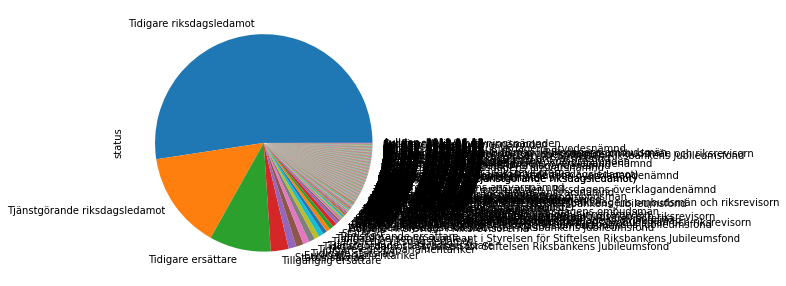

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

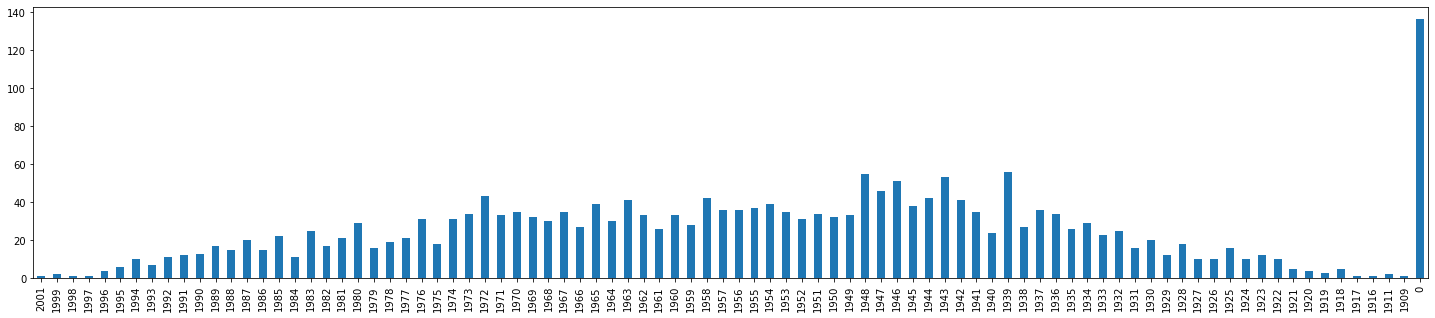

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.show()

In [20]:
df.iort.value_counts()

               2166
Stockholm         2
Luleå             1
Helsingborg       1
Stockaryd         1
Röstånga          1
Stjärnhov         1
Simrishamn        1
Visby             1
Norrhult          1
Gamleby           1
Bengtsfors        1
Hallsberg         1
Degerhamn         1
Gislaved          1
Skellefteå        1
Göteborg          1
Name: iort, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, queryP8388)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     2042 non-null   object
 1   riksdagenGUID  2042 non-null   object
 2   Source         2042 non-null   object
dtypes: object(3)
memory usage: 48.0+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
943,Q57168710,214d9393-c01e-497c-8580-d033b9f57705,PropertyP8388
1479,Q21614175,41587b4a-09fd-4ea8-964c-3de7e1526702,PropertyP8388
592,Q27750419,2774ffff-fec1-459c-b172-974af448f147,PropertyP8388
61,Q4963031,cda53f92-26af-4787-b77a-8ee43a3ac1c4,PropertyP8388
1924,Q57168699,67e327d0-b2ca-47eb-802a-c140187f0e0c,PropertyP8388
473,Q71545861,086bff3d-8adb-47c2-b5dc-86d4a9f1b191,PropertyP8388
498,Q114031271,0ce4c821-ec93-4deb-9fce-8b31f7355518,PropertyP8388
976,Q110793990,8bcaa801-9273-4771-a048-4427477353c6,PropertyP8388
708,Q297850,d7c31ae1-83e4-11d4-ae60-0050040c9b55,PropertyP8388
1569,Q303488,d7c32820-83e4-11d4-ae60-0050040c9b55,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      2042 non-null   object
 1   riksdagenGUID   2042 non-null   object
 2   Source          2042 non-null   object
 3   hangar_guid     2184 non-null   object
 4   sourceid        2184 non-null   object
 5   intressent_id   2184 non-null   object
 6   hangar_id       2184 non-null   object
 7   fodd_ar         2184 non-null   object
 8   kon             2184 non-null   object
 9   efternamn       2184 non-null   object
 10  tilltalsnamn    2184 non-null   object
 11  sorteringsnamn  2184 non-null   object
 12  iort            2184 non-null   object
 13  parti           2184 non-null   object
 14  valkrets        2184 non-null   object
 15  status          2184 non-null   object
 16  person_url_xml  2184 non-null   object
 17  bild_url_80     2184 non-null   object
 18  bild_url

In [25]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

both              2039
Riksdagen_only     145
WD_only              3
Name: WD_Riksdagen, dtype: int64

In [26]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','WD_Riksdagen','tilltalsnamn','efternamn','parti','fodd_ar','intressent_id']] 

In [27]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [28]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 2042 to 2186
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       145 non-null    object
 4   WD_Riksdagen   145 non-null    object
 5   tilltalsnamn   145 non-null    object
 6   efternamn      145 non-null    object
 7   parti          145 non-null    object
 8   fodd_ar        145 non-null    object
 9   intressent_id  145 non-null    object
dtypes: object(10)
memory usage: 12.5+ KB


In [29]:
pd.set_option('display.max_rows', None) 
#Riksdagen_only

In [30]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 2042 to 2186
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       145 non-null    object
 4   WD_Riksdagen   145 non-null    object
 5   tilltalsnamn   145 non-null    object
 6   efternamn      145 non-null    object
 7   parti          145 non-null    object
 8   fodd_ar        145 non-null    object
 9   intressent_id  145 non-null    object
 10  Riksdagen      145 non-null    object
dtypes: object(11)
memory usage: 13.6+ KB


In [31]:
Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False])
HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))


<ipython-input-31-a7439e506d00>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))


,fodd_ar,WikidataID,Riksdagen,tilltalsnamn,efternamn,intressent_id,parti
2070,1990,NaN,link,Andreas,Exner,0895451884323,SD
2068,1985,NaN,link,Karin,Ernlund,0998279389622,C
2108,1985,NaN,link,Andrea,Kronvall,0109529900621,SD
2053,1983,NaN,link,Paulina,Brandberg,099099202224,L
2115,1983,NaN,link,Parisa,Liljestrand,0647668663722,M
2058,1982,NaN,link,Johan,Danielsson,0613648926029,S
2060,1981,NaN,link,Magnus,Demervall,0635278379626,C
2109,1981,NaN,link,Peter,Kullgren,0168348837024,KD
2096,1978,NaN,link,Johan,Ingerö,0146277349624,KD
2071,1976,NaN,link,Khashayar,Farmanbar,0191486414825,S


In [32]:
Riksdagen_only["fodd_ar"].value_counts() 

0       94
1940     3
1937     3
1983     2
1985     2
1981     2
1954     2
1943     2
1942     2
1935     2
1939     1
1944     1
1941     1
1936     1
1947     1
1931     1
1928     1
1926     1
1923     1
1922     1
1919     1
1945     1
1990     1
1949     1
1950     1
1982     1
1978     1
1976     1
1974     1
1973     1
1972     1
1970     1
1965     1
1964     1
1962     1
1961     1
1959     1
1958     1
1955     1
1953     1
1952     1
Name: fodd_ar, dtype: int64

In [33]:
Riksdagen_only["parti"].value_counts() 

      93
S     20
M      9
C      7
V      4
MP     4
SD     3
KD     3
L      1
-      1
Name: parti, dtype: int64

In [34]:
Riksdagen_only.to_csv("Riksdagen_only.csv")

### Check WD if we have P1214 set but not P8388 GUID

In [35]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP1214 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenID  WHERE {
?item wdt:P1214 ?WDriksdagenID.
minus {?item wdt:P8388 ?riksdagenGUID}
}"""


WDP1214 = get_sparql_dataframe(endpoint_url, queryP1214)
WDP1214["Source"] = "PropertyP1214" 

In [36]:
WDP1214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     25 non-null     object
 1   WDriksdagenID  25 non-null     object
 2   Source         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [37]:
#Merge WDP1214 with Riksdagen_only
#mergeCheckWDP214[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy()  
mergeRiksdagenWDP214 = pd.merge(WDP1214, df,how='outer', left_on='WDriksdagenID', right_on='intressent_id',indicator=True)   
mergeRiksdagenWDP214.rename(columns={"_merge": "WDP1214_Riksdagen"},inplace = True)
mergeRiksdagenWDP214['WDP1214_Riksdagen'] = mergeRiksdagenWDP214['WDP1214_Riksdagen'].str.replace('left_only','WDP1214_only').str.replace('right_only','Riksdagenintressent_id_only')
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts()  
mergeRiksdagenWDP214.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2185
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WikidataID         25 non-null     object
 1   WDriksdagenID      25 non-null     object
 2   Source             25 non-null     object
 3   hangar_guid        2183 non-null   object
 4   sourceid           2183 non-null   object
 5   intressent_id      2183 non-null   object
 6   hangar_id          2183 non-null   object
 7   fodd_ar            2183 non-null   object
 8   kon                2183 non-null   object
 9   efternamn          2183 non-null   object
 10  tilltalsnamn       2183 non-null   object
 11  sorteringsnamn     2183 non-null   object
 12  iort               2183 non-null   object
 13  parti              2183 non-null   object
 14  valkrets           2183 non-null   object
 15  status             2183 non-null   object
 16  person_url_xml     2183 non-null   object


In [38]:
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts() 

Riksdagenintressent_id_only    2161
both                             22
WDP1214_only                      3
Name: WDP1214_Riksdagen, dtype: int64

In [39]:
Riksdagen_intressent_id_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "both"].copy() 
HTML(Riksdagen_intressent_id_only[{'sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen'}].to_html(escape=False))


<ipython-input-39-d5ef9ca04a7b>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  HTML(Riksdagen_intressent_id_only[{'sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen'}].to_html(escape=False))


,WikidataID,efternamn,fodd_ar,parti,sourceid,WDP1214_Riksdagen,tilltalsnamn,WDriksdagenID,intressent_id
1,Q2494607,Thorwaldsson,1964,S,1c96b775-a474-49d4-a829-e841280de062,both,Karl-Petter,0354791692918,0354791692918
4,Q19976668,Elger,1973,S,7bea2d2e-2c18-4114-a4b3-477169b6837d,both,Max,0596495003124,0596495003124
5,Q23915324,Axelsson Kihlblom,1970,S,ab886fb2-ca12-46fd-a350-6791d2a495a6,both,Lina,0877853587410,0877853587410
6,Q40321803,Liljestrand,1983,M,22fbe534-72a4-4d2c-9b10-8f7aa65fa5db,both,Parisa,0647668663722,0647668663722
7,Q63533075,Farmanbar,1976,S,9ebed08f-e572-4bd5-8d94-e46a41f6724d,both,Khashayar,0191486414825,0191486414825
8,Q97119947,Nilsson,1923,M,3eb88bea-5426-460c-a52d-1c443b0baf45,both,Barbro,0997984696398,0997984696398
9,Q98937482,Karlsson,1943,S,3f582708-6bdf-409f-8f98-276545978b10,both,Mats O,090502404202,090502404202
10,Q106560063,Mattisson,1935,M,4ecfbfb0-7c7f-4ac5-b6f0-e53d7c8ac311,both,Thor,0261479148307,0261479148307
11,Q107364088,M. Enow,1955,M,b65eac72-9f2b-4ee6-a92a-d6ab1a2bd993,both,Mohamoud,0910587614018,0910587614018
12,Q107364890,Lindström,1958,V,ab82f5d0-f3d4-4509-aba5-e0f89476bf24,both,Leif,0932188207010,0932188207010


In [40]:
#create file to update Wikidata with GUID 
#This file should be empty
HTML(Riksdagen_intressent_id_only[{'WikidataID','sourceid'}].to_html(escape=False))


<ipython-input-40-141e191bc8d9>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  HTML(Riksdagen_intressent_id_only[{'WikidataID','sourceid'}].to_html(escape=False))


,WikidataID,sourceid
1,Q2494607,1c96b775-a474-49d4-a829-e841280de062
4,Q19976668,7bea2d2e-2c18-4114-a4b3-477169b6837d
5,Q23915324,ab886fb2-ca12-46fd-a350-6791d2a495a6
6,Q40321803,22fbe534-72a4-4d2c-9b10-8f7aa65fa5db
7,Q63533075,9ebed08f-e572-4bd5-8d94-e46a41f6724d
8,Q97119947,3eb88bea-5426-460c-a52d-1c443b0baf45
9,Q98937482,3f582708-6bdf-409f-8f98-276545978b10
10,Q106560063,4ecfbfb0-7c7f-4ac5-b6f0-e53d7c8ac311
11,Q107364088,b65eac72-9f2b-4ee6-a92a-d6ab1a2bd993
12,Q107364890,ab82f5d0-f3d4-4509-aba5-e0f89476bf24


In [41]:
#Maybe should be empty. We need to ask Riksdagen if they delete people,,, if not we have errors in WD or in this Notebook
Riksdagen_intressent_wd_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "WDP1214_only"].copy() 
Riksdagen_intressent_wd_only

,WikidataID,WDriksdagenID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP1214_Riksdagen
0,Q1232072,0553241385804,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only
2,Q5619080,0631064113607,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only
3,Q5937929,0818762925009,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only


## Check WD if we have P8388 GUID set but not old P1214 
* as old documents use P1214 its make sense to have both
* new created records seems to lack P1214 at Riksdagen

In [42]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388miss = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenGUID  WHERE {
?item wdt:P8388 ?WDriksdagenGUID.
minus {?item wdt:P1214 ?riksdagenID}
}"""


WDP8388_miss = get_sparql_dataframe(endpoint_url, queryP8388miss)
WDP8388_miss["Source"] = "Property8388" 

In [43]:
WDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   WikidataID       50 non-null     object
 1   WDriksdagenGUID  50 non-null     object
 2   Source           50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [44]:
# merge WDP8388_miss WDriksdagenGUID with  
mergeRiksdagenWDP8388_miss = pd.merge(WDP8388_miss, df,how='outer', left_on='WDriksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWDP8388_miss.rename(columns={"_merge": "WDP8388_miss_Riksdagen"},inplace = True)
mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'] = mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'].str.replace('left_only','WDP8388_miss_Riksdagen_only').str.replace('right_only','Riksdagensourceid_only')
mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"].value_counts()  

Riksdagensourceid_only         2135
both                             48
WDP8388_miss_Riksdagen_only       2
Name: WDP8388_miss_Riksdagen, dtype: int64

In [45]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2184
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              50 non-null     object
 1   WDriksdagenGUID         50 non-null     object
 2   Source                  50 non-null     object
 3   hangar_guid             2183 non-null   object
 4   sourceid                2183 non-null   object
 5   intressent_id           2183 non-null   object
 6   hangar_id               2183 non-null   object
 7   fodd_ar                 2183 non-null   object
 8   kon                     2183 non-null   object
 9   efternamn               2183 non-null   object
 10  tilltalsnamn            2183 non-null   object
 11  sorteringsnamn          2183 non-null   object
 12  iort                    2183 non-null   object
 13  parti                   2183 non-null   object
 14  valkrets                2183 non-null   object
 15  stat

In [46]:
WD_P8388_only = mergeRiksdagenWDP8388_miss[mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"] == "both"].copy() 
# TO DO filter only records with intressent_id ==> those wD records should get P1214
HTML(WD_P8388_only[{'WikidataID','intressent_id','sourceid'}].to_html(escape=False))
WD_P8388_only

<ipython-input-46-cd133bb5f151>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  HTML(WD_P8388_only[{'WikidataID','intressent_id','sourceid'}].to_html(escape=False))


,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
0,Q129454,e82c1f92-231c-42ac-900c-bd2b84f8d34c,Property8388,cdcc0556-ac7b-48df-95e7-4dc79ad33081,e82c1f92-231c-42ac-900c-bd2b84f8d34c,,4788784,0,man,Egardt,Peter,"Egardt,Peter",,,,Ledamot i Riksdagens arvodesnämnd,https://data.riksdagen.se/person/e82c1f92-231c...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RAR', 'roll_kod': ...",,both
1,Q443148,bae72946-11c5-43c6-b77f-840575379156,Property8388,58844ed2-9155-4417-9c4c-6228691b4167,bae72946-11c5-43c6-b77f-840575379156,,4788866,0,okänt,Goudin,Hélène,"Goudin,Hélène",,JL,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/bae72946-11c5...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",,both
2,Q1976379,24f105bb-e207-46f4-b9b9-c2d53216c0ef,Property8388,2933d302-27cd-4ed2-8e3a-208656c42a77,24f105bb-e207-46f4-b9b9-c2d53216c0ef,,4788863,0,okänt,Wijkman,Anders,"Wijkman,Anders",,KD,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/24f105bb-e207...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",,both
3,Q4933709,69a92d50-4e6c-4299-a95b-50bb4950812a,Property8388,8d9be89f-32f7-40c7-846e-dce051c892e7,69a92d50-4e6c-4299-a95b-50bb4950812a,,4788861,0,kvinna,Ackum,Susanne,"Ackum,Susanne",,,,Ledamot i Riksbanksfullmäktige,https://data.riksdagen.se/person/69a92d50-4e6c...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RB', 'roll_kod': '...",,both
4,Q4935193,7a8e4e1d-ca9d-4cdf-80d6-b26baad306c2,Property8388,b94d6fc6-d498-4723-887f-7cfa9048df91,7a8e4e1d-ca9d-4cdf-80d6-b26baad306c2,,4788840,0,kvinna,Almgren,Karin,"Almgren,Karin",,,,Vice ordförande i Riksdagens ansvarsnämnd,https://data.riksdagen.se/person/7a8e4e1d-ca9d...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RAN', 'roll_kod': ...",,both
5,Q4936260,8aaa214a-3eb6-41e0-8595-3920b1b6583a,Property8388,f24c445a-dd22-46a6-9848-00617e559ade,8aaa214a-3eb6-41e0-8595-3920b1b6583a,,4788805,0,kvinna,Antemar,Gudrun,"Antemar,Gudrun",,,,Tidigare riksrevisor i Riksrevisorerna,https://data.riksdagen.se/person/8aaa214a-3eb6...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RR', 'roll_kod': '...",,both
6,Q4951560,359f8aff-7d2a-4e0b-9204-040fe3fe5f97,Property8388,2638f86a-8923-4625-990f-ef946187414e,359f8aff-7d2a-4e0b-9204-040fe3fe5f97,,4788845,0,kvinna,Gustafsson,Yvonne,"Gustafsson,Yvonne",,,,Tidigare ledamot i Nämnden för lön till riksda...,https://data.riksdagen.se/person/359f8aff-7d2a...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'NL', 'roll_kod': '...",,both
7,Q4963031,cda53f92-26af-4787-b77a-8ee43a3ac1c4,Property8388,2d384ce6-8902-4b8c-b669-61192e3f6b67,cda53f92-26af-4787-b77a-8ee43a3ac1c4,,4788785,0,kvinna,Lindsö,Ebba,"Lindsö,Ebba",,,,Tidigare ledamot i Riksbanksfullmäktige,https://data.riksdagen.se/person/cda53f92-26af...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/le

In [47]:
WD_P8388_only[WD_P8388_only["kon"] =="man"]

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
0,Q129454,e82c1f92-231c-42ac-900c-bd2b84f8d34c,Property8388,cdcc0556-ac7b-48df-95e7-4dc79ad33081,e82c1f92-231c-42ac-900c-bd2b84f8d34c,,4788784,0,man,Egardt,Peter,"Egardt,Peter",,,,Ledamot i Riksdagens arvodesnämnd,https://data.riksdagen.se/person/e82c1f92-231c...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RAR', 'roll_kod': ...",,both
12,Q5085688,09dc32c9-5feb-4ea5-8ffb-b368f3a81046,Property8388,81082d6c-3187-40de-81f2-0c4b110c814a,09dc32c9-5feb-4ea5-8ffb-b368f3a81046,,5035037,0,man,Weimers,Charlie,"Weimers,Charlie",,SD,,Europaparlamentariker,https://data.riksdagen.se/person/09dc32c9-5feb...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",,both
13,Q5560308,32a23826-6fd4-4a82-bcef-6bc64df3007d,Property8388,2b3939e7-0f94-4192-b12d-27c3f47b391a,32a23826-6fd4-4a82-bcef-6bc64df3007d,0618278689611,4467795,1958,man,Arthursson,Michael,"Arthursson,Michael",,C,,,https://data.riksdagen.se/person/32a23826-6fd4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'C', 'roll_kod': 'P...",,both
14,Q5562878,00c9e963-15a1-44fd-b4bd-4e3320d40089,Property8388,45a0c910-0f50-47a4-8c4e-7301e50164e2,00c9e963-15a1-44fd-b4bd-4e3320d40089,,4788815,0,man,Axberger,Hans-Gunnar,"Axberger,Hans-Gunnar",,,,Tidigare justitieombudsman i Riksdagens ombudsmän,https://data.riksdagen.se/person/00c9e963-15a1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'JO', 'roll_kod': '...",,both
16,Q5570438,cdb93e95-0448-4e48-a505-b727d738f332,Property8388,e85a509a-b52b-4934-8d27-e86fd7d2ada6,cdb93e95-0448-4e48-a505-b727d738f332,,4788860,0,man,Bengtsson,Ulf,"Bengtsson,Ulf",,,,Tidigare riksrevisor i Riksrevisorerna,https://data.riksdagen.se/person/cdb93e95-0448...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RR', 'roll_kod': '...",,both
17,Q5622734,26cc589d-9450-4b41-a1d2-708e7074bf7d,Property8388,1e33c854-fc1d-440e-b576-1e96e3b75417,26cc589d-9450-4b41-a1d2-708e7074bf7d,,4788876,0,man,Djupsund,Göran,"Djupsund,Göran",,,,Tidigare personlig suppleant i Styrelsen för S...,https://data.riksdagen.se/person/26cc589d-9450...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RJ', 'roll_kod': '...",,both
18,Q5626658,eaaa0029-034e-4ca7-840a-c44f231fb150,Property8388,555f0c43-f7ca-4408-b3ee-84079ee514ac,eaaa0029-034e-4ca7-840a-c44f231fb150,,4788826,0,man,Tunhammar,Göran,"Tunhammar,Göran",,,,Tidigare ledamot i Riksdagens arvodesnämnd,https://data.riksdagen.se/person/eaaa0029-034e...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'RAR', 'roll_kod': ...",,both
19,Q5811605,aa1f4499-3620-4435-a2a5-3a274a88077d,Property8388,b8cb1289-d03b-4b43-9869-716863390102,aa1f4499-3620-4435-a2a5-3a274a88077d,,5035035,0,man,Holmgren,Pär,"Holmgren,Pär",,MP,,Europaparlamentariker,https://data.riksdagen.se/person/aa1f4499-3620...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,h

In [48]:
WD_P8388_only["intressent_id"].str

In [49]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2184
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              50 non-null     object
 1   WDriksdagenGUID         50 non-null     object
 2   Source                  50 non-null     object
 3   hangar_guid             2183 non-null   object
 4   sourceid                2183 non-null   object
 5   intressent_id           2183 non-null   object
 6   hangar_id               2183 non-null   object
 7   fodd_ar                 2183 non-null   object
 8   kon                     2183 non-null   object
 9   efternamn               2183 non-null   object
 10  tilltalsnamn            2183 non-null   object
 11  sorteringsnamn          2183 non-null   object
 12  iort                    2183 non-null   object
 13  parti                   2183 non-null   object
 14  valkrets                2183 non-null   object
 15  stat

In [50]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2023-04-30 07:44:43.087296
Time elapsed (hh:mm:ss.ms) 0:00:20.952574
